In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv(r"C:\Users\HAI\Downloads\PCA\PCA\wine.csv")
df = pd.DataFrame(data)
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
#checking for the null values or missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [21]:
#checking for the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [22]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


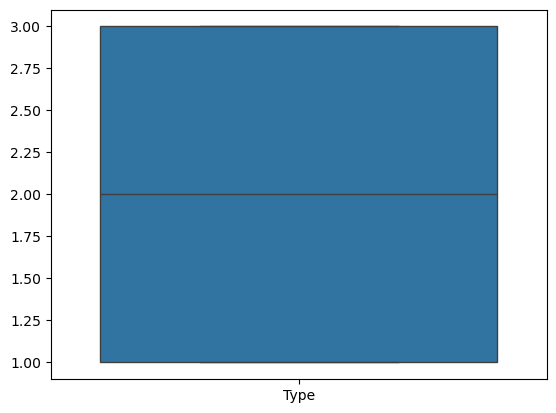

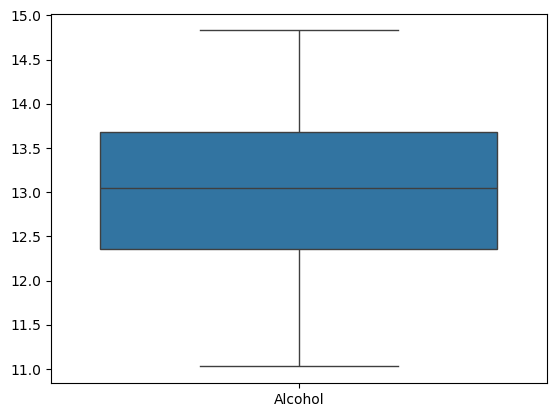

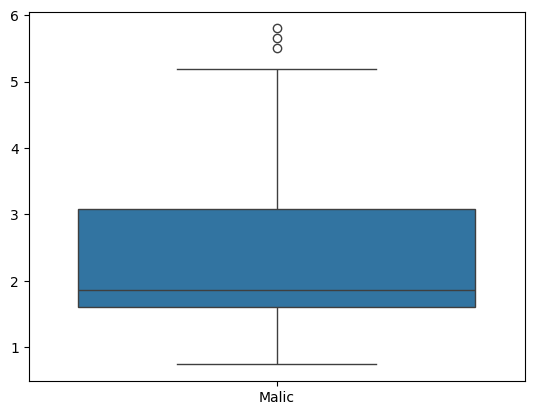

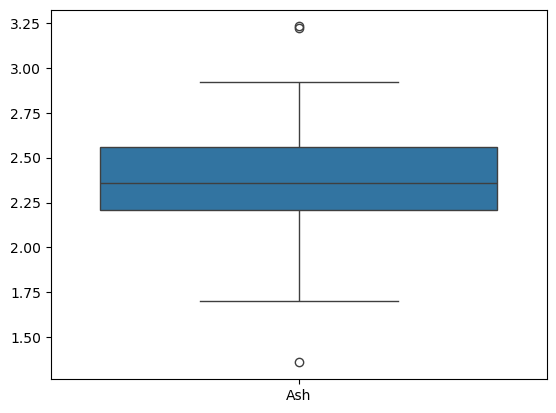

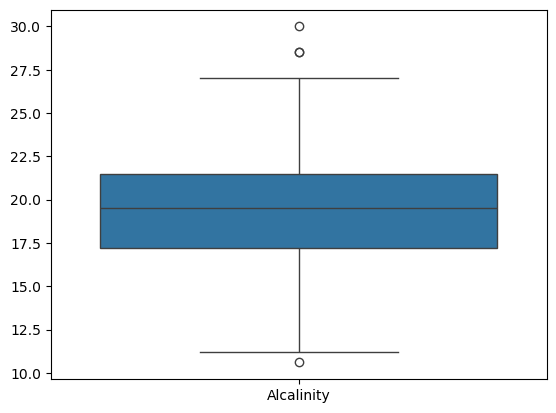

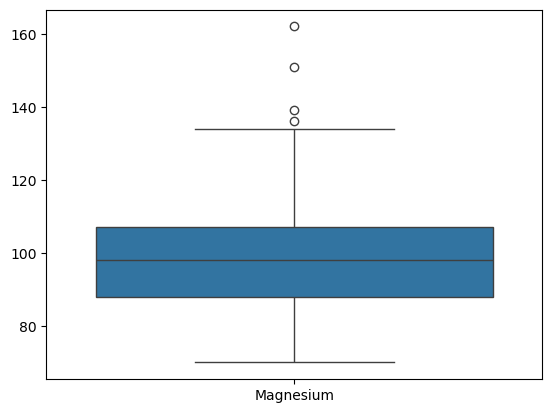

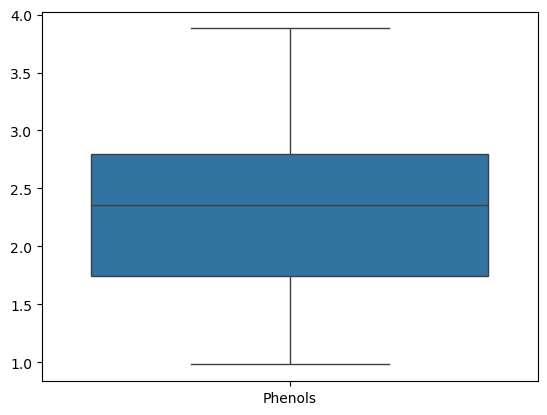

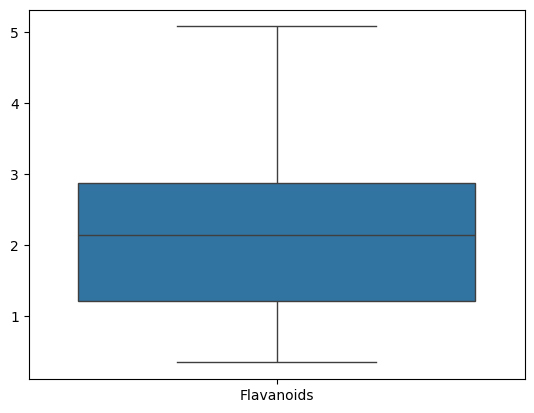

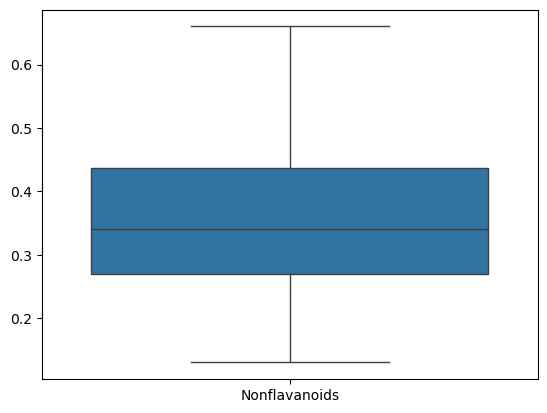

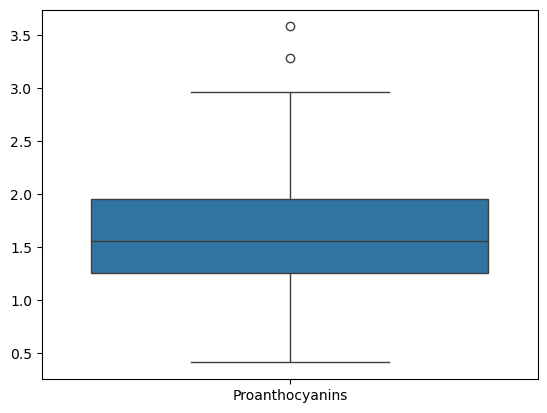

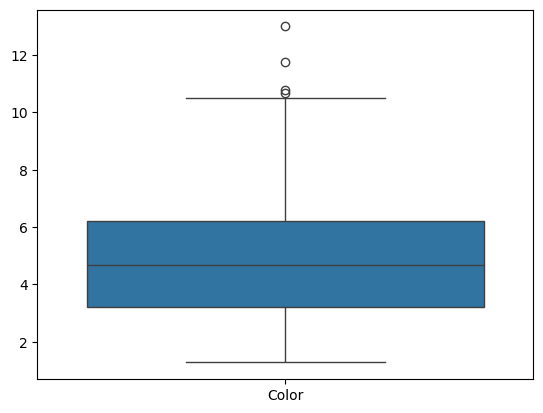

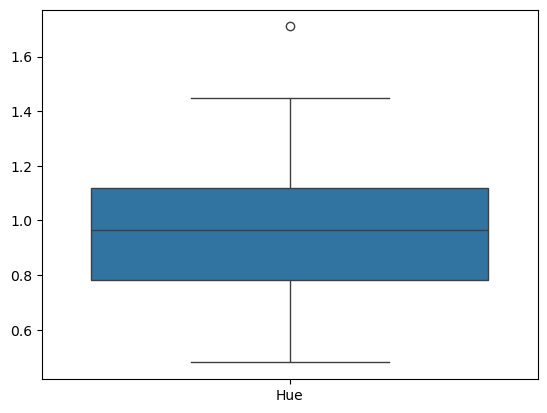

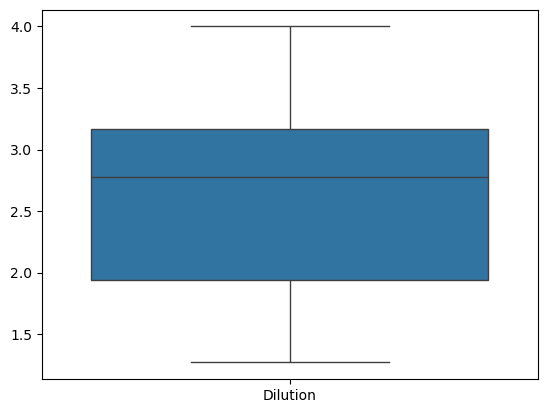

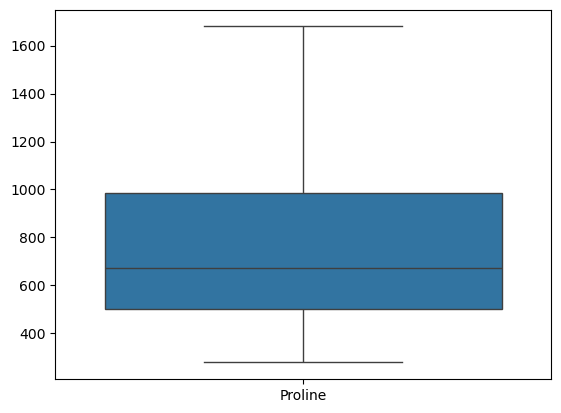

In [23]:
#checking for the outliers numarical columns
for col in df.select_dtypes(include = 'number'):
    sns.boxplot(df[[col]])
    plt.show()

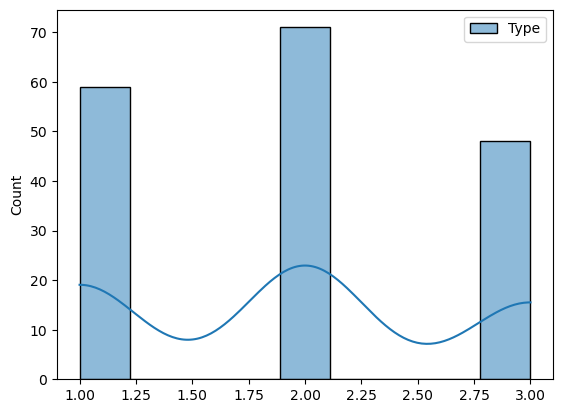

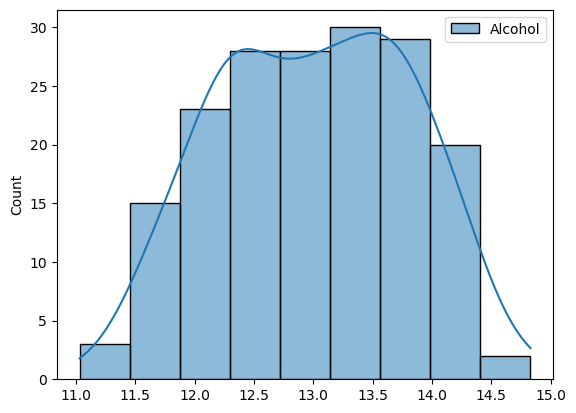

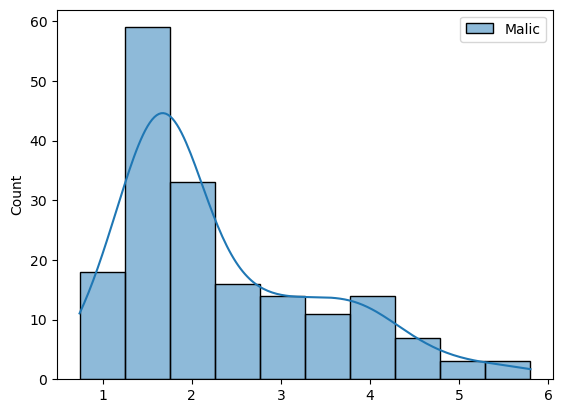

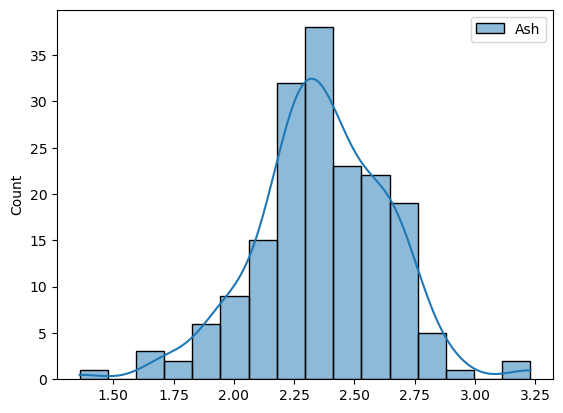

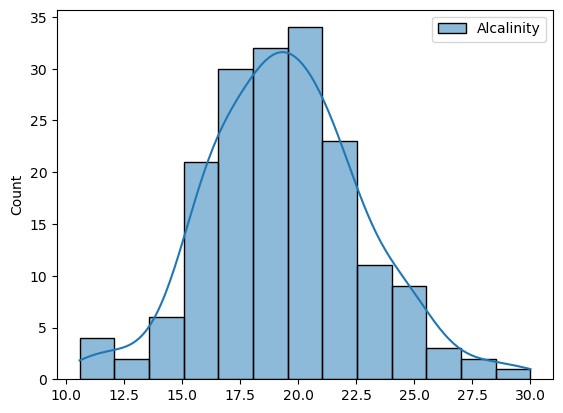

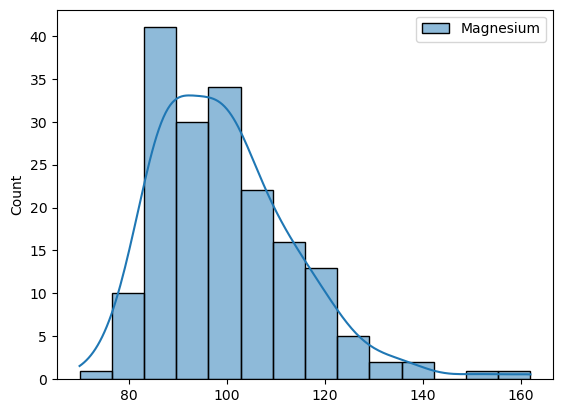

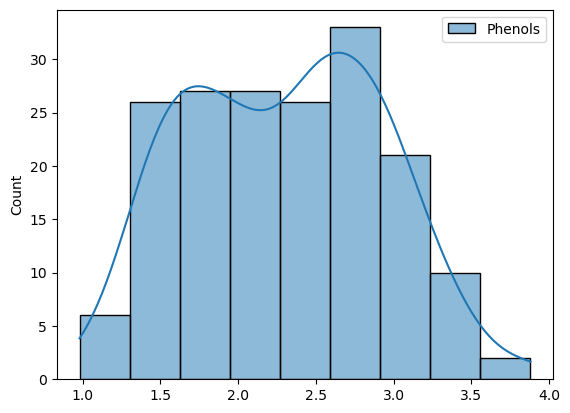

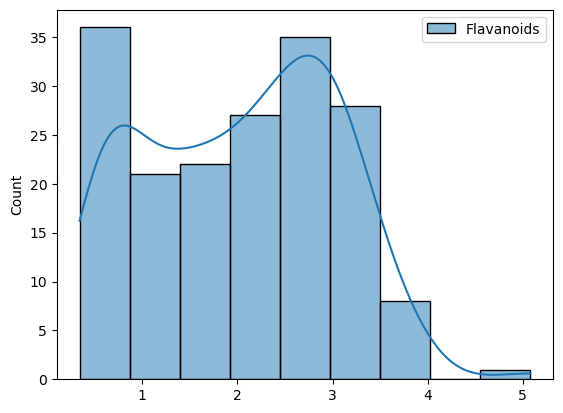

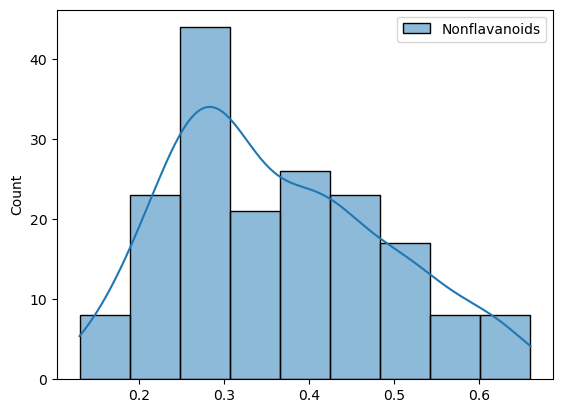

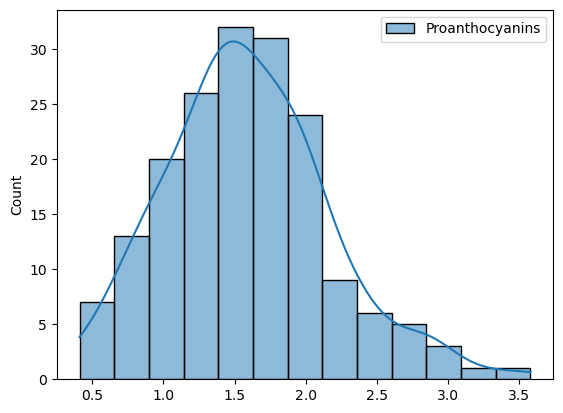

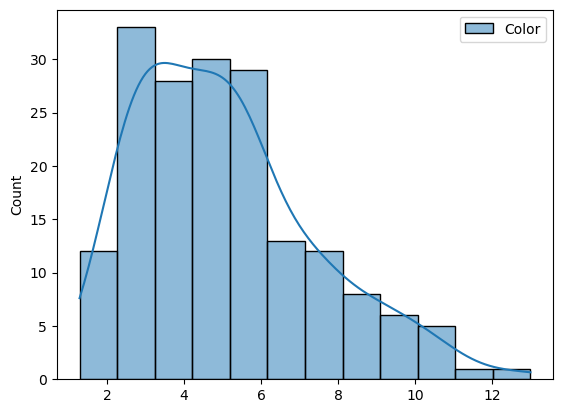

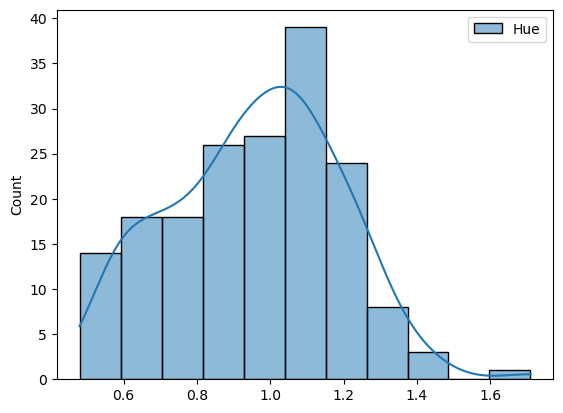

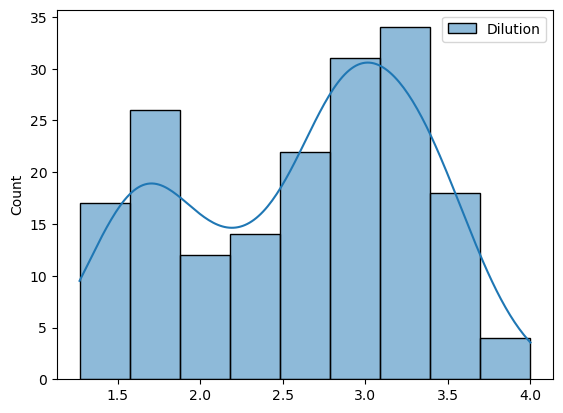

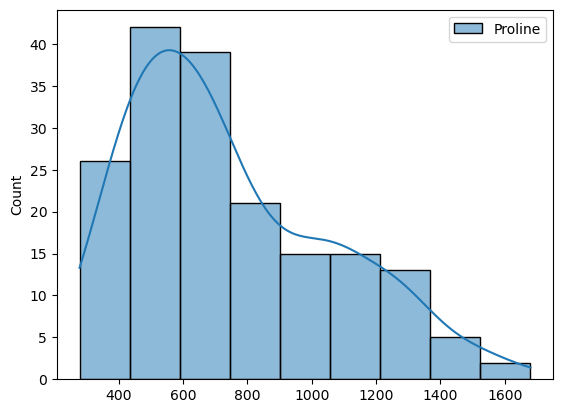

In [24]:
#checking for the distribution 
for col in df.select_dtypes(include = 'number'):
    sns.histplot(df[[col]],kde = True)
    plt.show()

In [25]:
#check for the skewness of the data
for col in df.select_dtypes(include = 'number'):
    print(col,':',df[col].skew())

Type : 0.10743112358094281
Alcohol : -0.051482331077134784
Malic : 1.0396511925814442
Ash : -0.17669931645735712
Alcalinity : 0.21304688642645586
Magnesium : 1.098191054755161
Phenols : 0.08663858640245253
Flavanoids : 0.02534355338149103
Nonflavanoids : 0.4501513355621236
Proanthocyanins : 0.5171371722998975
Color : 0.8685847909572548
Hue : 0.021091272199709302
Dilution : -0.30728549895848106
Proline : 0.7678217813897322


In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [27]:
std = StandardScaler()
mms = MinMaxScaler()

In [28]:
df[['Nonflavanoids','Dilution']] = std.fit_transform(df[['Nonflavanoids','Dilution']]).astype(int)

In [29]:
df[['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Proanthocyanins','Color','Hue','Proline']] = mms.fit_transform(df[['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Proanthocyanins','Color','Hue','Proline']]).astype(int)

In [30]:
for col in df.columns:
    print(col,":",df[col].unique())

Type : [1 2 3]
Alcohol : [0 1]
Malic : [0 1]
Ash : [0]
Alcalinity : [0 1]
Magnesium : [0 1]
Phenols : [0 1]
Flavanoids : [0]
Nonflavanoids : [ 0 -1  1  2]
Proanthocyanins : [0]
Color : [0]
Hue : [0 1]
Dilution : [ 1  0 -1]
Proline : [0 1]


In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [32]:
x = df.drop('Type',axis = 1)

In [36]:
pca_model = PCA(n_components = 5,random_state = 42)

In [37]:
print(pca_model.get_params())

{'copy': True, 'iterated_power': 'auto', 'n_components': 5, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': 42, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}


In [38]:
x_pca = pca_model.fit_transform(x)

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x_pca)

C:\Users\HAI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\HAI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\HAI\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HAI\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

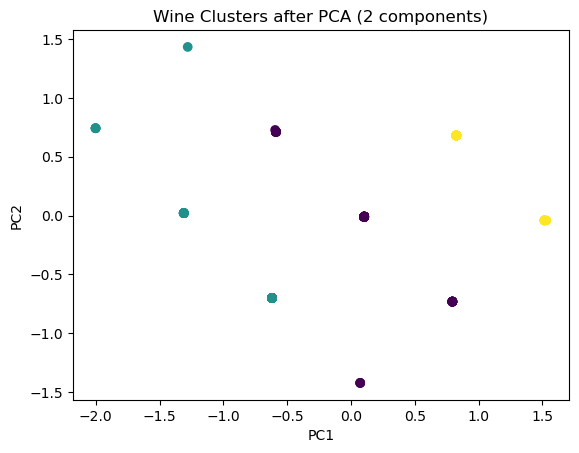

In [44]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Clusters after PCA (2 components)")
plt.show()